In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import sys
sys.path

['',
 '/Users/liew/anaconda3/lib/python36.zip',
 '/Users/liew/anaconda3/lib/python3.6',
 '/Users/liew/anaconda3/lib/python3.6/lib-dynload',
 '/Users/liew/anaconda3/lib/python3.6/site-packages',
 '/Users/liew/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/liew/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg',
 '/Users/liew/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/liew/.ipython']

# EDA

In [4]:
df_train = pd.read_csv('data/sales_train.csv.gz', compression='gzip')
df_test = pd.read_csv('data/test.csv.gz', compression='gzip')
df_shops = pd.read_csv('data/shops.csv')
df_item_categories = pd.read_csv('data/item_categories.csv')
df_items = pd.read_csv('data/items.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv.gz',compression='gzip')

In [5]:
df_items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [6]:
df_item_categories.nunique()

item_category_name    84
item_category_id      84
dtype: int64

In [7]:
df_train = pd.merge(df_train, df_items)
df_train = pd.merge(df_train, df_item_categories)
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [9]:
df_test = pd.merge(df_test, df_items)
df_test = pd.merge(df_test, df_item_categories)
df_test.head()

,ID,shop_id,item_id,item_name,item_category_id,item_category_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
1,5100,4,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
2,10200,6,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
3,15300,3,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
4,20400,2,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3


In [8]:
df_train.nunique()

date                   1034
date_block_num           34
shop_id                  60
item_id               21807
item_price            19993
item_cnt_day            198
item_name             21807
item_category_id         84
item_category_name       84
dtype: int64

In [11]:
df_test.nunique()

ID                    214200
shop_id                   42
item_id                 5100
item_name               5100
item_category_id          62
item_category_name        62
dtype: int64

In [12]:
def diff_unique(x, y):
    x, y = set(x), set(y)
    return x - y, y - x

In [16]:
for col in ['shop_id', 'item_id', 'item_category_id']:
    d1, d2 = diff_unique(df_train[col], df_test[col])
    print(col, len(d1), len(d2))

shop_id 18 0
item_id 17070 363
item_category_id 22 0


In [9]:
pd.options.display.float_format = '{:20,.2f}'.format
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,14.57,33.00,"10,197.23",890.85,1.24,40.00
std,9.42,16.23,"6,324.30","1,729.80",2.62,17.10
min,0.00,0.00,0.00,-1.00,-22.00,0.00
25%,7.00,22.00,"4,476.00",249.00,1.00,28.00
50%,14.00,31.00,"9,343.00",399.00,1.00,40.00
75%,23.00,47.00,"15,684.00",999.00,1.00,55.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00",83.00


In [17]:
df_train['date_formatted'] = pd.to_datetime(df_train.date, format="%d.%m.%Y")
df_train[['day','month','year']] = df_train.date.str.split('.',expand=True)
df_train['sales'] = df_train.item_price * df_train.item_cnt_day

/Users/liew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


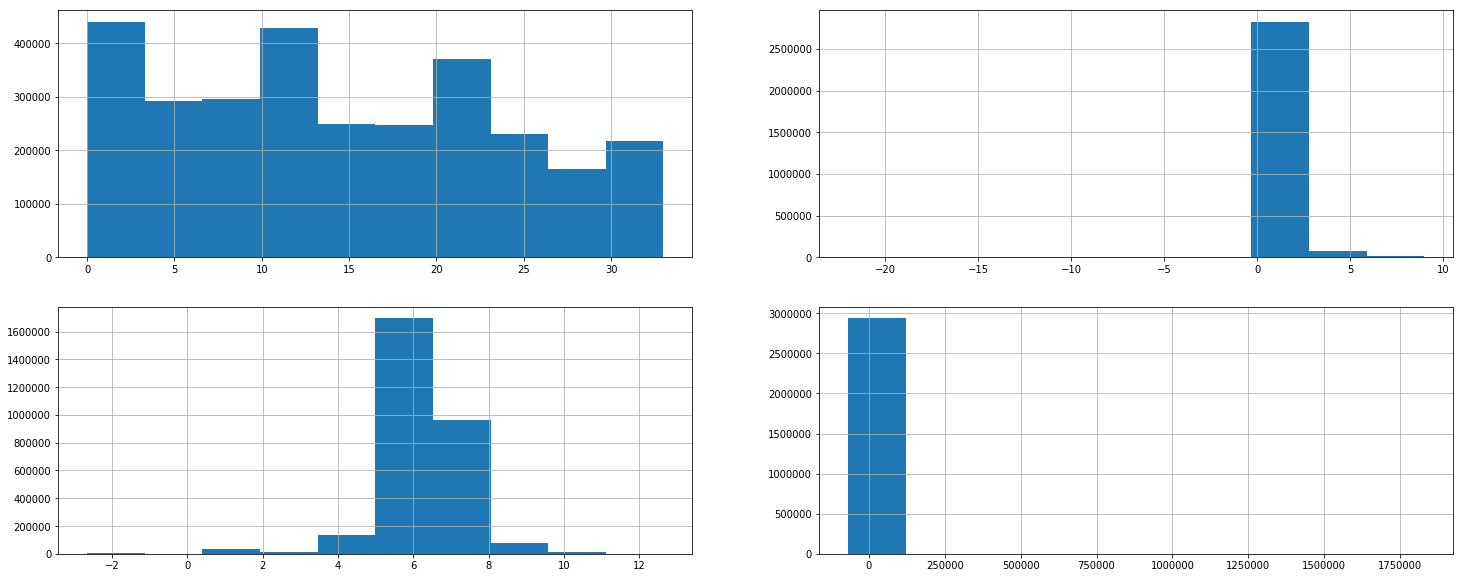

In [22]:
fig, axes = plt.subplots(2,2, figsize=(25,10))
df_train.date_block_num.hist(ax=axes[0][0])
df_train[df_train['item_cnt_day'] < 10].item_cnt_day.hist(ax=axes[0][1])
np.log(df_train['item_price']).hist(ax=axes[1][0])
df_train.sales.hist(ax=axes[1][1])

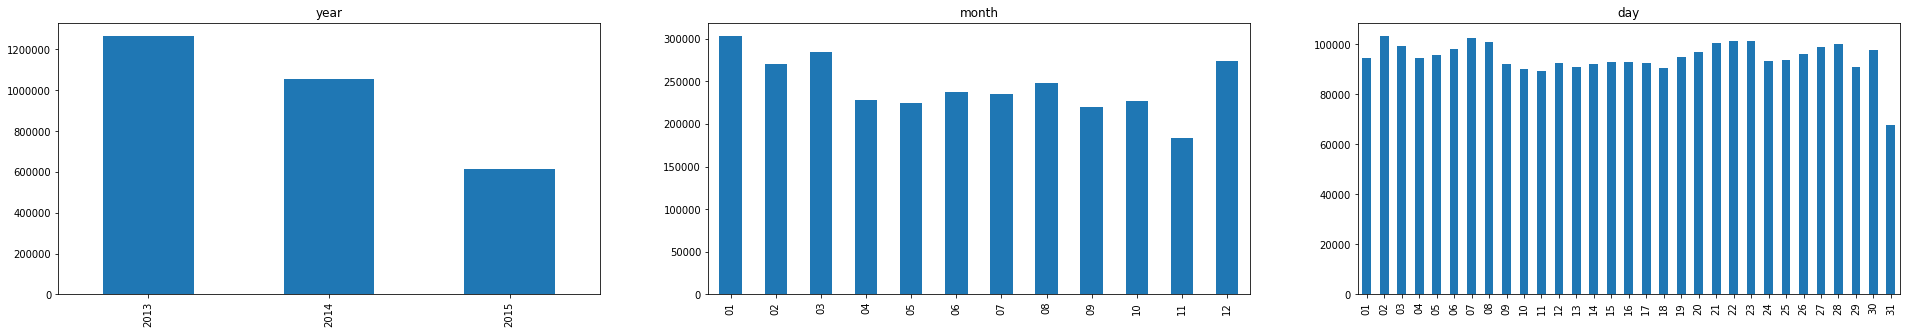

In [6]:
fig, axes = plt.subplots(1,3, figsize=(33,5))

df_train.year.value_counts().sort_index().plot.bar(ax=axes[0],title='year')
df_train.month.value_counts().sort_index().plot.bar(ax=axes[1],title='month')
df_train.day.value_counts().sort_index().plot.bar(ax=axes[2],title='day')

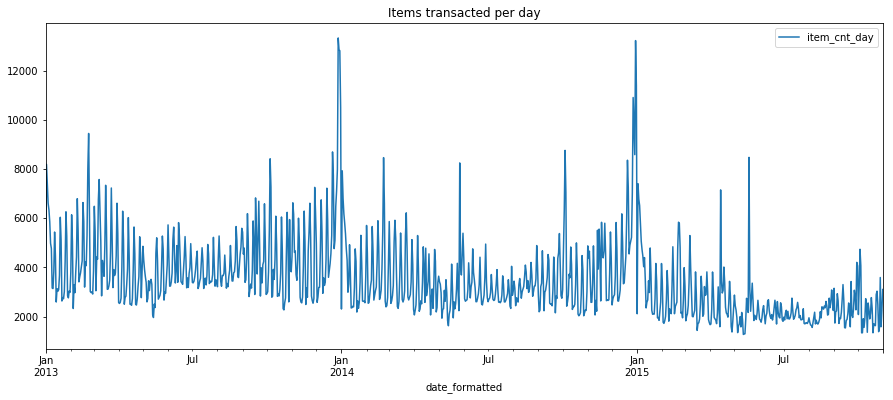

In [9]:
df_train.groupby('date_formatted').agg({"item_cnt_day": "sum"}).plot(figsize=(15,6),title="Items transacted per day")

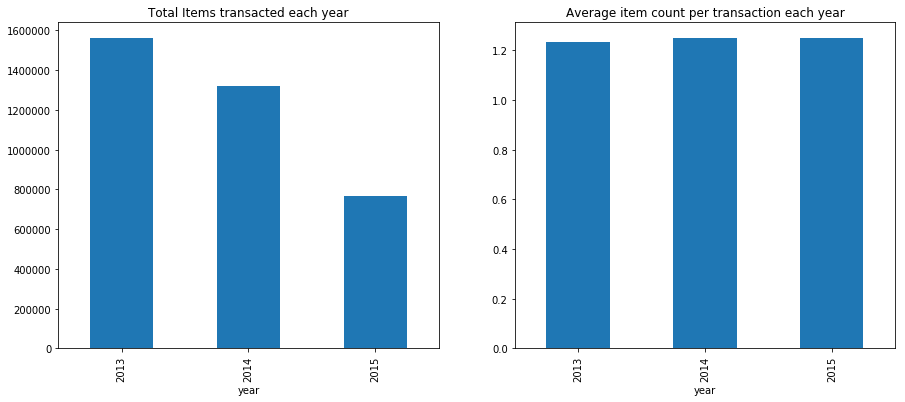

In [10]:
fig, axes = plt.subplots(1,2, figsize=(33,5))

df_train.groupby('year').item_cnt_day.sum().plot.bar(figsize=(15,6),title="Total Items transacted each year", ax=axes[0])
df_train.groupby('year').item_cnt_day.mean().plot.bar(figsize=(15,6),title="Average item count per transaction each year", ax=axes[1])

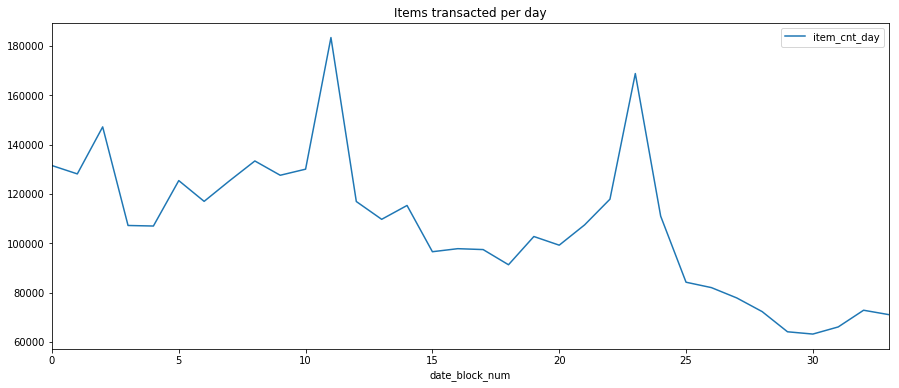

In [11]:
df_train.groupby('date_block_num').agg({"item_cnt_day": "sum"}).plot(figsize=(15,6),title="Items transacted per day")

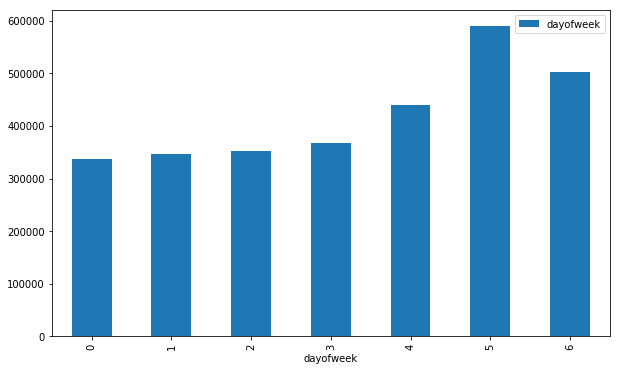

In [13]:


df_train['dayofweek'] = df_train.date_formatted.dt.dayofweek # The day of the week with Monday=0, Sunday=6
df_train.groupby("dayofweek").agg({"dayofweek": "count"}).plot.bar(figsize=(10, 6));



[Text(0,0.5,'sum item_cnt_day'), Text(0.5,0,'date month')]

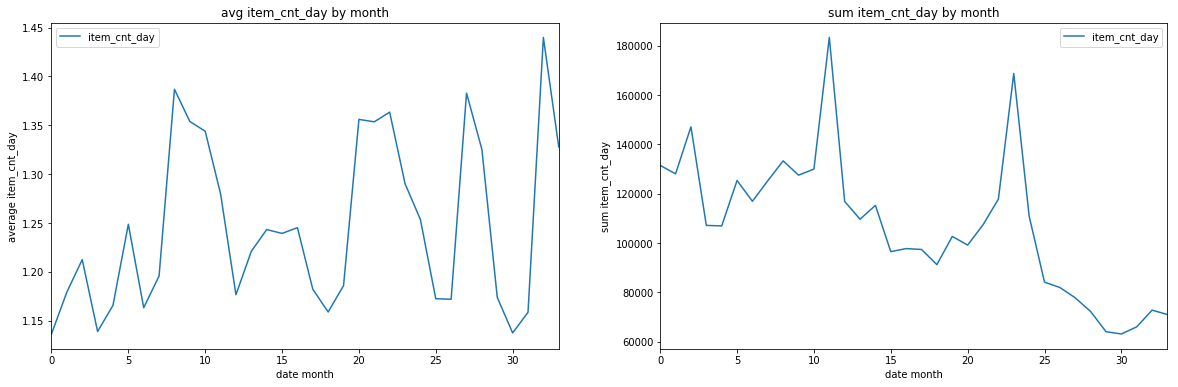

In [14]:
df_train['date_month'] = (df_train.year + df_train.month)
fig, axes = plt.subplots(1,2, figsize=(25,5))
ax = df_train.groupby('date_month').item_cnt_day.mean().reset_index().plot(x_compat=True,title="avg item_cnt_day by month", figsize=(20,6), ax=axes[0])
ax.set(xlabel='date month', ylabel='average item_cnt_day')

ax = df_train.groupby('date_month').item_cnt_day.sum().reset_index().plot(x_compat=True,title="sum item_cnt_day by month", figsize=(20,6), ax=axes[1])
ax.set(xlabel='date month', ylabel='sum item_cnt_day')

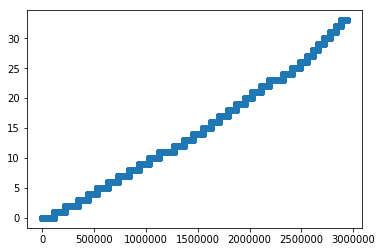

In [17]:
plt.scatter(df_train.index, df_train.date_block_num)

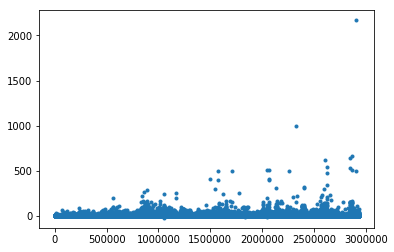

In [18]:
plt.plot(df_train.item_cnt_day,'.')

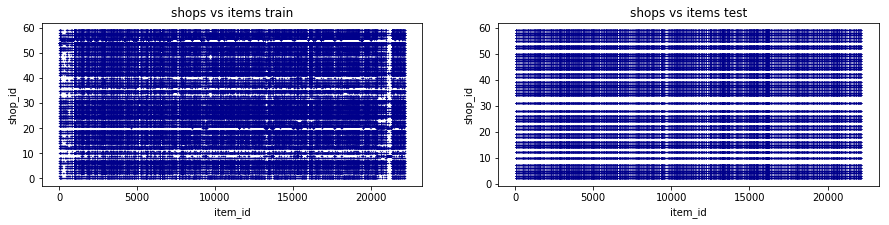

In [19]:


# plot items for each shop -- training set vs test set
fix, axes = plt.subplots(1,2,figsize=(15,3))

df_train.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[0], title="shops vs items train")
df_test.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[1], title="shops vs items test")

